# Importing important libraries:

In [91]:
import pandas as pd
import numpy as np

In [182]:
# import data
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Exploratory Data Analysis (EDA)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [94]:
df.shape

(4177, 9)

In [183]:
# Check for missing values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [184]:
# checking numbers of count of Male, Female and Infant
df.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [97]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [185]:
# Height cant be zero so removing the 0 height value from data set
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [99]:
df.drop(index=[1257,3996], inplace = True)
df.shape

(4175, 9)

        - No missing values in the dataset
        - All numerical features but 'sex'
        - Though features are not normaly distributed, are close to normality
        - None of the features have minimum = 0 except Height 
        - Each feature has difference scale range

# Visualizing the data

In [100]:
import seaborn as sns

<AxesSubplot:xlabel='Sex', ylabel='count'>

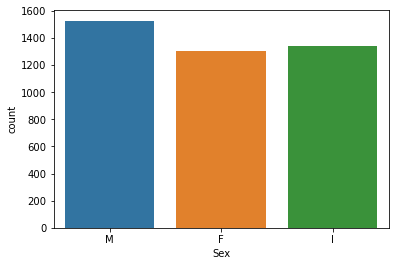

In [101]:
sns.countplot(data=df, x='Sex')

checking numbers of counts of 'Sex' with help of bar plot

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

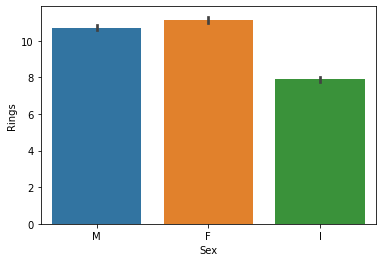

In [102]:
sns.barplot(x='Sex',y='Rings',data = df)

checking numbers of counts of 'Sex' with respect to 'Rings'

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

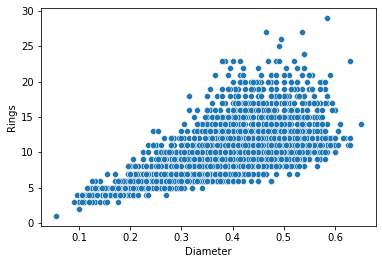

In [103]:
sns.scatterplot(x='Diameter',y='Rings',data = df)

Scatter plots are used to determine whether two variables have a relationship or not. Here I want to see if the diameter and the number or the rings mean something together.

<AxesSubplot:xlabel='Length', ylabel='Rings'>

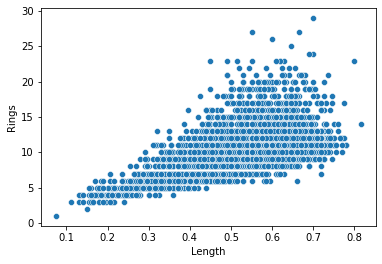

In [104]:
sns.scatterplot(x='Length',y='Rings',data = df)

I want to see if the Lenght and the number or the rings mean something together.

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

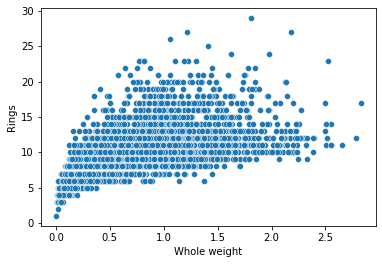

In [105]:
sns.scatterplot(x='Whole weight',y='Rings',data = df)

I want to see if the Whole weight and the number or the rings mean something together.

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

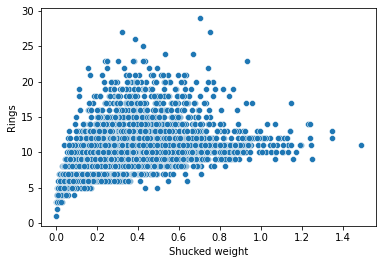

In [106]:
sns.scatterplot(x='Shucked weight',y='Rings',data = df)

I want to see if the Shucked weight and the number or the rings mean something together.

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

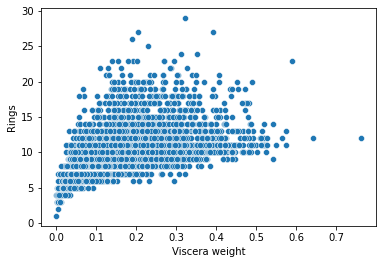

In [107]:
sns.scatterplot(x='Viscera weight',y='Rings',data = df)

I want to see if the Viscera weight and the number or the rings mean something together.

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>, <AxesSubplot:>]],
      dtype=object)

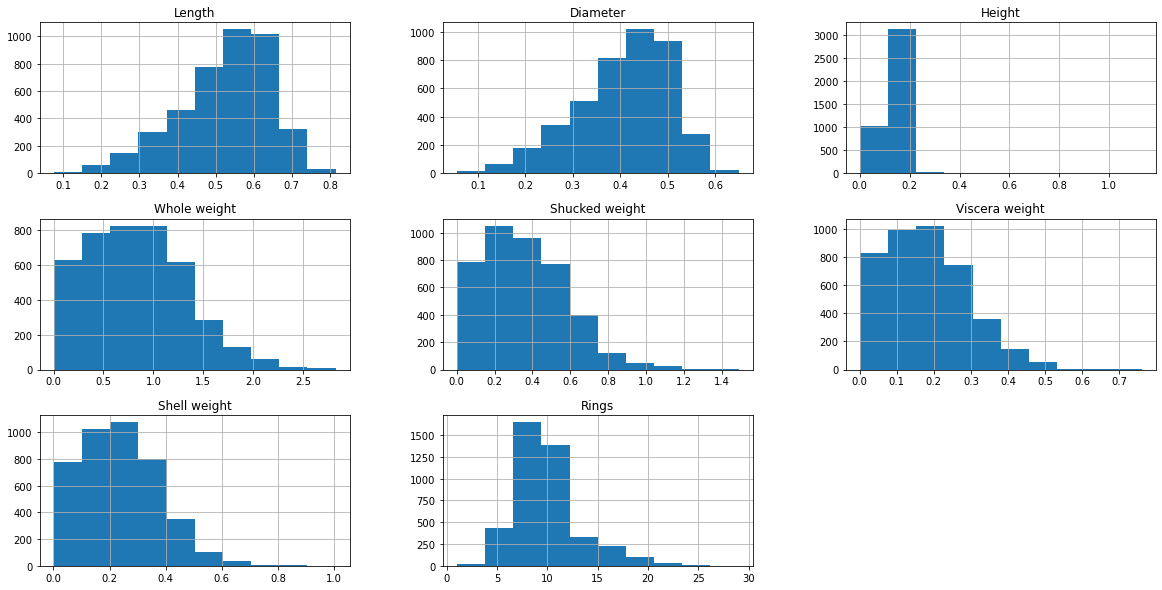

In [186]:
#Histograms: Understanding the Distribution of the Numerical Features
df.hist(figsize = (20,10), layout = (3,3))

Skewness of the height is too high. (need to normalise later...)
Need to check skewness for all varibles

In [187]:
#Skewness of the Variables
df.skew().sort_values(ascending = False)

C:\Users\prath\AppData\Local\Temp/ipykernel_14128/3236223965.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew().sort_values(ascending = False)


Height            3.128817
Rings             1.114102
Shucked weight    0.719098
Shell weight      0.620927
Viscera weight    0.591852
Whole weight      0.530959
Diameter         -0.609198
Length           -0.639873
dtype: float64

Skewness is close to 0 for Normal distribution curve.
Height has the highest skewness of 3.17.
May be there are outliers in height, we need to check that and remove them before modeling.
Will check the coorelation with the dependent variable (Rings)

In [110]:
import matplotlib.pyplot as plt

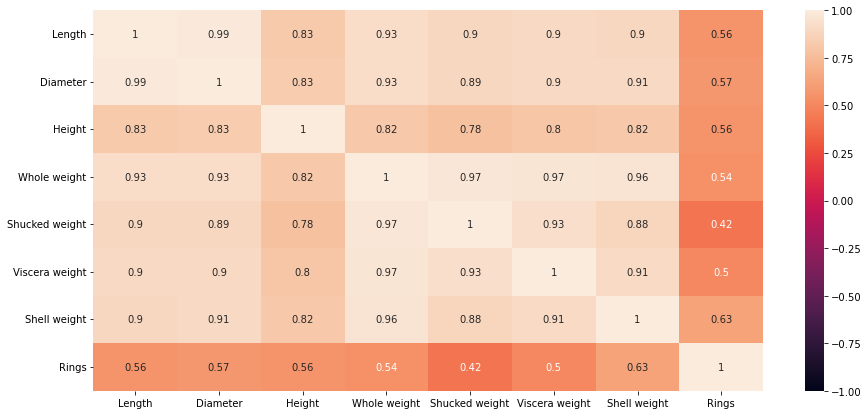

In [111]:
df_corr = df.corr().abs()
plt.figure(figsize=(15,7))
sns.heatmap(df_corr,annot = True, annot_kws={'size':10},vmin = -1)
plt.show()

Whole Weight is almost linearly varying with all other features except age
    Heigh has least linearity with remaining features
    Age is most linearly proprtional with Shell Weight followed by Diameter and length
    Age is least correlated with Shucked Weight


In [112]:
x = df.corr()

In [113]:
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986802,0.828108,0.925217,0.897859,0.902960,0.898419,0.556464
Diameter,0.986802,1.000000,0.834298,0.925414,0.893108,0.899672,0.906084,0.574418
Height,0.828108,0.834298,1.000000,0.819886,0.775621,0.798908,0.819596,0.557625
Whole weight,0.925217,0.925414,0.819886,1.000000,0.969389,0.966354,0.955924,0.540151
Shucked weight,0.897859,0.893108,0.775621,0.969389,1.000000,0.931924,0.883129,0.420597
Viscera weight,0.902960,0.899672,0.798908,0.966354,0.931924,1.000000,0.908186,0.503562
Shell weight,0.898419,0.906084,0.819596,0.955924,0.883129,0.908186,1.000000,0.627928
Rings,0.556464,0.574418,0.557625,0.540151,0.420597,0.503562,0.627928,1.000000


High coorelation between Length & Diameter and
High corelation between shucked weight, viscera weight Vs Whole_weight & Shell weight vs Whole_weight

upper_tri = x.where(np.triu(np.ones(x.shape),k=1).astype(np.bool))
columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)] 

print("Columns to drop:\n", columns_to_drop)

df.drop(columns_to_drop, axis=1, inplace = True)
df.head()

In [191]:
df['Age'] = df['Rings']+1.5 
df.drop('Rings', axis = 1, inplace = True)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [192]:
#  Way to turn categorical data to numerical is by using Ordinal Encoder.
from sklearn.preprocessing import OrdinalEncoder
onc =  OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = onc.fit_transform(df[i].values.reshape(-1,1))


In [193]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [194]:
# Independent & Dependent Features
x = df.drop("Age", axis = 1)
y = df["Age"]

In [118]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


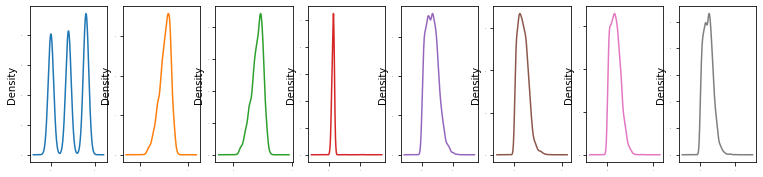

In [119]:
x.plot(kind = 'density', subplots = True, layout = (6,11), sharex = False, legend = False, fontsize = 1, figsize = (18,20))
plt.show()

In [120]:
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4175, dtype: float64

In [121]:
x.skew().sort_values()

Length           -0.640993
Diameter         -0.610182
Sex              -0.098224
Whole weight      0.530549
Viscera weight    0.591455
Shell weight      0.621081
Shucked weight    0.718735
Height            3.166364
dtype: float64

In [122]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   float64
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Whole weight    4175 non-null   float64
 5   Shucked weight  4175 non-null   float64
 6   Viscera weight  4175 non-null   float64
 7   Shell weight    4175 non-null   float64
dtypes: float64(8)
memory usage: 422.6 KB


Checking for outliers with help of boxplot.

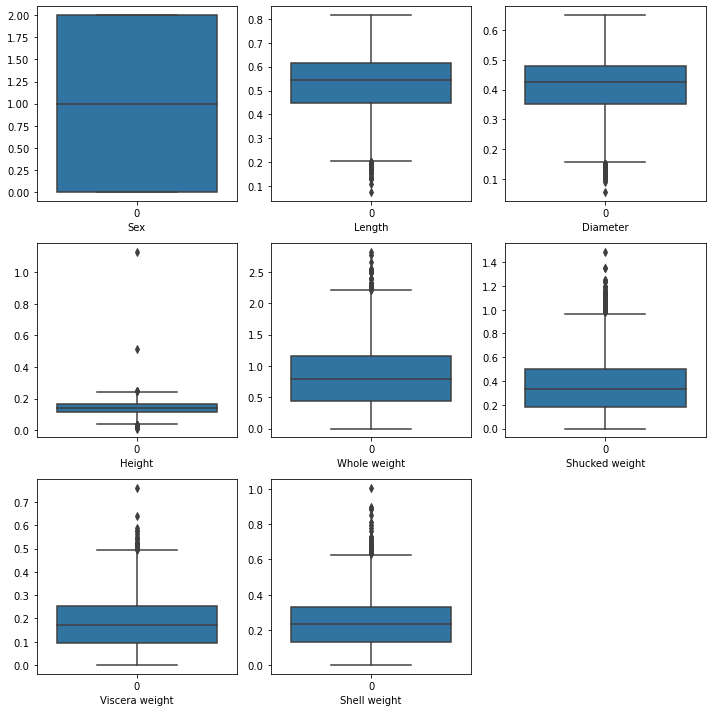

In [123]:
plt.figure(figsize = (10,10), facecolor = 'white')
i = 1
for columns in x:
    if i<=9:
        ax = plt.subplot(3,3,i)
        sns.boxplot(data = x[columns])
        plt.xlabel(columns,fontsize = 10)
    
    i+=1
    plt.tight_layout()

Z score normalization is used for normalizing the data set.It's helpful in removing the outliers in the data.It's used to normalize the data when each attribute has a different unit of measurement.

In [124]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,1.151675,0.575276,0.432829,1.068619,0.642485,0.608200,0.726809,0.638195,1.571079
1,1.151675,1.449876,1.440813,1.188465,1.230912,1.171446,1.205857,1.212926,0.910433
2,1.280415,0.049438,0.121562,0.109856,0.310030,0.464009,0.357258,0.207146,0.290055
3,1.151675,0.700219,0.432829,0.349547,0.638406,0.648754,0.608188,0.602274,0.020134
4,0.064370,1.616466,1.541611,1.428155,1.272724,1.216506,1.287980,1.320688,0.910433
...,...,...,...,...,...,...,...,...,...
4172,1.280415,0.340972,0.423957,0.609217,0.118288,0.047419,0.532403,0.073036,0.330323
4173,1.151675,0.549210,0.323158,0.109856,0.279417,0.358331,0.308847,0.155653,0.020134
4174,1.151675,0.632505,0.675952,1.567980,0.707734,0.748098,0.974953,0.496900,0.290055
4175,1.280415,0.840743,0.776751,0.249680,0.541506,0.772880,0.733147,0.410690,0.020134


Z score keeping the thresold as 3 and removing the outliers

In [125]:
df = df[(z<3).all(axis = 1)]
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [126]:
x = df.drop("Age", axis = 1)
y = df["Age"]

# Preprocessing, Modeling, Evaluation

In [127]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [128]:
from sklearn.preprocessing import  StandardScaler

Standardize features by removing the mean and scaling to unit variance.

In [129]:
sc = StandardScaler()
sc.fit_transform(x)

array([[ 1.15969763, -0.56936804, -0.42027443, ..., -0.6037333 ,
        -0.72305677, -0.63065934],
       [ 1.15969763, -1.47535808, -1.4631268 , ..., -1.20941043,
        -1.23110406, -1.25603283],
       [-1.28538214,  0.07776771,  0.15329438, ..., -0.44867996,
        -0.33113458, -0.16162923],
       ...,
       [ 1.15969763,  0.68176107,  0.72686319, ...,  0.85473721,
         1.08172072,  0.60445329],
       [-1.28538214,  0.89747298,  0.83114842, ...,  0.88138701,
         0.82527781,  0.51064727],
       [ 1.15969763,  1.63089349,  1.56114509, ...,  2.88981235,
         1.94298183,  2.06626381]])

In [130]:
# Calculating best value for Random State for this model
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print(i)

13
163
215
533
585
606
620
655
691
817
835
901
938
960


In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 13)

LinearRegression( r2 score)

In [132]:
lr.fit(x_train,y_train)

LinearRegression()

In [133]:
 pred_train = lr.predict(x_train)

In [134]:
pred_test = lr.predict(x_test)

In [135]:
r2_score(y_test,pred_test)*100,1

(51.35598321379556, 1)

In [180]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error

KNeighborsRegressor (r2 score)

In [137]:
kn = KNeighborsRegressor()

In [138]:
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [139]:
pred_train = kn.predict(x_train)

In [140]:
pred_test = kn.predict(x_test)

In [141]:
r2_score(y_test,pred_test)*100,1

(51.63386909019003, 1)

RandomForestRegressor (r2 score)

In [142]:
rf = RandomForestRegressor()

In [143]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [144]:
pred_train = rf.predict(x_train)

In [145]:
pred_test = rf.predict(x_test)

In [146]:
r2_score(y_test,pred_test)*100,1

(55.311004401572994, 1)

GradientBoostingRegressor( r2 score)

In [147]:
gbr = GradientBoostingRegressor()

In [148]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [149]:
pred_train = gbr.predict(x_train)

In [150]:
pred_test = gbr.predict(x_test)

In [151]:
r2_score(y_test,pred_test)*100,1

(54.934248627218054, 1)

SVR( r2 score)

In [152]:
svr = SVR()

In [153]:
svr.fit(x_train,y_train)

SVR()

In [154]:
pred_train = svr.predict(x_train)

In [155]:
pred_test = svr.predict(x_test)

In [156]:
r2_score(y_test,pred_test)*100,1

(47.885748647380055, 1)

Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.

In [157]:
from sklearn.model_selection import cross_val_score
src = cross_val_score(lr,x,y,cv = 7)
print(src.mean())

0.43688004459691293


In [158]:
src = cross_val_score(kn,x,y,cv = 7)
print(src.mean())

0.4509074146626545


In [159]:
src = cross_val_score(rf,x,y,cv = 7)
print(src.mean())

0.47300982870199004


In [160]:
src = cross_val_score(gbr,x,y,cv = 7)
print(src.mean())

0.4857503032322012


In [161]:
src = cross_val_score(svr,x,y,cv = 7)
print(src.mean())

0.4642218513084258


Random forest gives highest r2 score of 55%

# Hyperparameter Tuning

In [162]:
from sklearn.model_selection import RandomizedSearchCV

In [171]:
params = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [172]:
rnd_search = RandomizedSearchCV(RandomForestRegressor(),cv = 5, param_distributions = params)

In [173]:
rnd_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]})

In [174]:
rnd_search.best_estimator_

RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=230)

In [178]:
rf = RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=230)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
acc = metrics.r2_score(y_test,y_pred)
print(acc)

0.5601965686054198


In [181]:
best_est = rnd_search.best_estimator_
y_pred = best_est.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)

1.9413523572092755


We will apply multiple Regression and Classification models for checking the accuracy score but the RandomForestRegressor gives us the best r2 score and lowest mean squared error

In [197]:
import joblib
joblib.dump(rnd_search.best_estimator_,"abalone_age_prediciton.pkl")

['abalone_age_prediciton.pkl']